In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.ticker as mtick
import pymongo
import datetime
from flask import Flask

from sqlalchemy import create_engine
import json

In [2]:
data_weather_df = pd.read_csv("./Resources/data1.csv")
data_weather_df.tail(2)

,datetime,Chicago
8782,12/31/2016,274.96
8783,12/31/2016,274.66


In [3]:
data_weather_df['Temperature F'] = data_weather_df['Chicago']*1.8 -459.67

In [4]:
data_weather_df

,datetime,Chicago,Temperature F
0,1/1/2016,269.47,25.376
1,1/1/2016,269.01,24.548
2,1/1/2016,268.83,24.224
3,1/1/2016,268.31,23.288
4,1/1/2016,268.59,23.792
...,...,...,...
8779,12/31/2016,276.36,37.778
8780,12/31/2016,276.36,37.778
8781,12/31/2016,275.37,35.996
8782,12/31/2016,274.96,35.258


In [5]:

data_weather_df.sort_values("datetime", ascending=True)

,datetime,Chicago,Temperature F
0,1/1/2016,269.47,25.376
22,1/1/2016,271.04,28.202
21,1/1/2016,271.04,28.202
20,1/1/2016,270.64,27.482
19,1/1/2016,270.48,27.194
...,...,...,...
6050,9/9/2016,296.26,73.598
6049,9/9/2016,296.69,74.372
6048,9/9/2016,298.96,78.458
6059,9/9/2016,290.57,63.356


In [6]:
data_weather_df = data_weather_df.drop('Chicago', 1)

In [7]:
data_weather_df = data_weather_df.rename(columns = {"datetime": 'Date'})

In [8]:
grouped_df = data_weather_df.groupby(['Date'])

In [9]:
average_temp_df = grouped_df.aggregate(['mean'])

In [10]:
average_temp_df

,Temperature F
,mean
Date,
1/1/2016,24.17525
1/10/2016,20.45600
1/11/2016,6.38900
1/12/2016,15.52925
1/13/2016,6.54875
...,...
9/5/2016,73.80350
9/6/2016,81.64025


In [11]:
average_temp_df.index = pd.to_datetime(average_temp_df.index) #convert the index to a datetime object
average_temp_df = average_temp_df.sort_index() #sort the converted 

In [12]:
average_temp_df

,Temperature F
,mean
Date,
2016-01-01,24.17525
2016-01-02,27.29225
2016-01-03,27.36425
2016-01-04,27.75350
2016-01-05,25.03550
...,...
2016-12-27,30.40175
2016-12-28,29.89850


In [13]:
average_temp_df['Temperature F'] = average_temp_df['Temperature F'].round()

In [14]:
average_temp_df

,Temperature F
,mean
Date,
2016-01-01,24.0
2016-01-02,27.0
2016-01-03,27.0
2016-01-04,28.0
2016-01-05,25.0
...,...
2016-12-27,30.0
2016-12-28,30.0


In [15]:
taxi_january_df = pd.read_csv("./Resources/January.csv")
taxi_january_df.tail(2)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
1048573,1618.0,1/31/2016 23:45,1/31/2016 23:45,420.0,1.1,NaN,NaN,8.0,8.0,6.75,0.0,0.0,0.0,6.75,Cash,NaN,599.0,346.0,599.0,346.0
1048574,251.0,1/31/2016 23:45,1/31/2016 23:45,540.0,1.1,NaN,179.0,8.0,32.0,7.25,0.0,0.0,0.0,7.25,Cash,10.0,210.0,470.0,30.0,405.0


In [16]:
taxi_january_df1= taxi_january_df[['trip_start_timestamp','trip_miles','fare']]

In [17]:
taxi_january_df1

,trip_start_timestamp,trip_miles,fare
0,1/1/2016 0:00,0.0,0.00
1,1/1/2016 0:00,0.5,21.85
2,1/1/2016 0:00,3.6,10.25
3,1/1/2016 0:00,2.0,7.65
4,1/1/2016 0:00,3.1,9.45
...,...,...,...
1048570,1/31/2016 23:45,0.0,6.75
1048571,1/31/2016 23:45,0.0,8.75
1048572,1/31/2016 23:45,0.9,5.75
1048573,1/31/2016 23:45,1.1,6.75


In [18]:
taxi_february_df = pd.read_csv("./Resources/Feb.csv")
taxi_february_df1= taxi_february_df[['trip_start_timestamp','trip_miles','fare']]
taxi_february_df1

,trip_start_timestamp,trip_miles,fare
0,2/28/2016 4:30,0.30,15.00
1,2/10/2016 11:30,1.01,7.00
2,2/18/2016 15:15,0.40,4.50
3,2/17/2016 22:00,2.30,8.75
4,2/22/2016 13:45,17.10,42.00
...,...,...,...
1048570,2/23/2016 23:30,0.10,7.75
1048571,2/12/2016 8:15,0.00,3.25
1048572,2/27/2016 14:45,1.40,8.00
1048573,2/1/2016 17:45,0.70,5.75


In [19]:
taxi_march_df = pd.read_csv("./Resources/Mar.csv")
taxi_march_df1= taxi_march_df[['trip_start_timestamp','trip_miles','fare']]
taxi_march_df1


,trip_start_timestamp,trip_miles,fare
0,3/13/2016 11:45,0.0,3.25
1,3/14/2016 20:00,2.1,9.25
2,3/16/2016 7:15,0.8,5.25
3,3/1/2016 10:30,1.0,7.50
4,3/5/2016 2:45,3.3,11.25
...,...,...,...
1048570,3/22/2016 16:00,1.6,8.50
1048571,3/17/2016 10:15,1.7,9.00
1048572,3/12/2016 16:45,2.3,8.25
1048573,3/8/2016 7:15,12.5,34.00


In [20]:
taxi_april_df = pd.read_csv("./Resources/Apr.csv")
taxi_april_df1= taxi_april_df[['trip_start_timestamp','trip_miles','fare']]
taxi_april_df1

,trip_start_timestamp,trip_miles,fare
0,4/5/2016 8:15,0.70,34.75
1,4/16/2016 9:30,0.00,52.25
2,4/10/2016 14:45,0.98,6.50
3,4/4/2016 16:45,1.45,7.75
4,4/11/2016 15:00,0.00,9.00
...,...,...,...
1048570,4/2/2016 11:00,0.30,4.25
1048571,4/5/2016 17:45,1.80,8.25
1048572,4/26/2016 11:00,1.10,6.75
1048573,4/22/2016 6:15,2.50,8.25


In [21]:
taxi_may_df = pd.read_csv("./Resources/May.csv")
taxi_may_df1= taxi_may_df[['trip_start_timestamp','trip_miles','fare']]
taxi_may_df1

,trip_start_timestamp,trip_miles,fare
0,5/4/2016 15:00,1.5,7.00
1,5/24/2016 18:15,0.0,8.50
2,5/4/2016 15:45,0.0,4.50
3,5/22/2016 2:00,4.8,17.50
4,5/12/2016 14:15,0.0,7.50
...,...,...,...
1048570,5/24/2016 17:00,1.6,8.00
1048571,5/9/2016 21:15,1.6,7.25
1048572,5/5/2016 7:45,15.0,37.00
1048573,5/3/2016 20:15,1.0,6.50


In [22]:
taxi_june_df = pd.read_csv("./Resources/June.csv")
taxi_june_df1= taxi_june_df[['trip_start_timestamp','trip_miles','fare']]
taxi_june_df1

,trip_start_timestamp,trip_miles,fare
0,6/5/2016 19:15,6.9,19.75
1,6/29/2016 17:00,14.3,41.25
2,6/18/2016 7:15,11.8,30.50
3,6/6/2016 21:45,1.1,6.75
4,6/3/2016 17:30,0.1,10.00
...,...,...,...
1048570,6/26/2016 14:15,0.6,5.25
1048571,6/16/2016 17:00,0.5,5.25
1048572,6/18/2016 1:15,0.1,9.25
1048573,6/28/2016 13:30,3.5,8.75


In [23]:
taxi_july_df = pd.read_csv("./Resources/July.csv")
taxi_july_df1= taxi_july_df[['trip_start_timestamp','trip_miles','fare']]
taxi_july_df1

,trip_start_timestamp,trip_miles,fare
0,7/12/2016 16:00,0.10,10.25
1,7/31/2016 21:45,1.60,7.75
2,7/15/2016 13:45,4.22,13.25
3,7/12/2016 23:15,2.70,10.75
4,7/30/2016 5:00,17.50,43.25
...,...,...,...
1048570,7/24/2016 2:15,2.10,9.25
1048571,7/21/2016 0:00,0.00,7.50
1048572,7/30/2016 9:45,1.50,7.50
1048573,7/5/2016 9:15,0.90,6.75


In [24]:
taxi_august_df = pd.read_csv("./Resources/Aug.csv")
taxi_august_df1= taxi_august_df[['trip_start_timestamp','trip_miles','fare']]
taxi_august_df1

,trip_start_timestamp,trip_miles,fare
0,8/15/2016 16:30,0.60,6.00
1,8/23/2016 18:45,0.00,6.75
2,8/23/2016 11:00,0.60,5.25
3,8/29/2016 0:30,3.70,11.50
4,8/13/2016 23:45,12.12,32.25
...,...,...,...
1048570,8/18/2016 6:45,0.60,4.75
1048571,8/27/2016 2:15,1.00,8.75
1048572,8/2/2016 20:00,15.10,38.00
1048573,8/20/2016 10:15,1.10,6.25


In [25]:
taxi_september_df = pd.read_csv("./Resources/Sep.csv")
taxi_september_df1= taxi_september_df[['trip_start_timestamp','trip_miles','fare']]
taxi_september_df1

,trip_start_timestamp,trip_miles,fare
0,9/24/2016 15:45,0.0,8.00
1,9/25/2016 15:45,11.7,31.25
2,9/21/2016 16:15,0.0,57.25
3,9/6/2016 16:30,22.1,61.25
4,9/28/2016 19:15,3.7,14.50
...,...,...,...
1048570,9/22/2016 19:00,7.5,27.25
1048571,9/15/2016 23:45,5.8,22.00
1048572,9/8/2016 15:30,0.0,5.00
1048573,9/23/2016 20:15,1.9,8.50


In [26]:
taxi_october_df = pd.read_csv("./Resources/Oct.csv")
taxi_october_df1= taxi_october_df[['trip_start_timestamp','trip_miles','fare']]
taxi_october_df1

,trip_start_timestamp,trip_miles,fare
0,10/2/2016 16:45,17.40,43.50
1,10/26/2016 11:30,14.90,38.00
2,10/21/2016 12:00,1.00,6.25
3,10/21/2016 23:15,0.80,5.50
4,10/2/2016 0:00,1.80,8.75
...,...,...,...
1048570,10/27/2016 22:30,0.40,4.25
1048571,10/20/2016 5:30,0.00,3.50
1048572,10/21/2016 22:45,0.00,11.75
1048573,10/4/2016 13:45,0.60,5.50


In [27]:
taxi_november_df = pd.read_csv("./Resources/Nov.csv")
taxi_november_df1= taxi_november_df[['trip_start_timestamp','trip_miles','fare']]
taxi_november_df1

,trip_start_timestamp,trip_miles,fare
0,11/5/2016 11:45,2.70,11.25
1,11/30/2016 13:30,1.30,7.50
2,11/2/2016 16:45,7.80,22.50
3,11/6/2016 19:30,1.40,7.50
4,11/5/2016 13:15,2.90,12.00
...,...,...,...
1048570,11/27/2016 0:45,1.04,7.25
1048571,11/21/2016 17:15,1.40,7.00
1048572,11/27/2016 1:00,2.10,9.00
1048573,11/6/2016 4:30,13.50,35.50


In [28]:
taxi_december_df = pd.read_csv("./Resources/Dec.csv")
taxi_december_df1= taxi_december_df[['trip_start_timestamp','trip_miles','fare']]
taxi_december_df1

,trip_start_timestamp,trip_miles,fare
0,12/15/2016 23:45,2.5,10.75
1,12/12/2016 7:15,0.4,5.00
2,12/16/2016 16:30,10.7,31.00
3,12/16/2016 8:45,0.0,5.25
4,12/3/2016 18:45,0.3,5.00
...,...,...,...
1048570,12/18/2016 11:00,0.5,4.50
1048571,12/28/2016 19:15,0.6,5.00
1048572,12/4/2016 0:00,1.1,6.50
1048573,12/7/2016 0:30,0.6,28.00


In [29]:
jan_feb = taxi_january_df1.append(taxi_february_df1,ignore_index=True)

In [30]:
jan_feb_mar = jan_feb.append(taxi_march_df1, ignore_index=True)

In [31]:
jan_april = jan_feb_mar.append(taxi_april_df1, ignore_index=True)

In [32]:
jan_may = jan_april.append(taxi_may_df1, ignore_index=True)

In [33]:
jan_june = jan_may.append(taxi_june_df1, ignore_index=True)

In [34]:
jan_july = jan_june.append(taxi_july_df1, ignore_index=True)

In [35]:
jan_august = jan_july.append(taxi_august_df1, ignore_index=True)

In [36]:
jan_september = jan_august.append(taxi_september_df1, ignore_index=True)

In [37]:
jan_october = jan_september.append(taxi_october_df1, ignore_index=True)

In [38]:
jan_november = jan_october.append(taxi_november_df1, ignore_index=True)

In [39]:
jan_december = jan_november.append(taxi_december_df1, ignore_index=True)

In [40]:
jan_december[['Date','Time']] = jan_december['trip_start_timestamp'].str.split(' ', expand=True)

In [41]:
jan_december.head(1)

,trip_start_timestamp,trip_miles,fare,Date,Time
0,1/1/2016 0:00,0.0,0.0,1/1/2016,0:00


In [42]:
jan_december1= jan_december[['Date','trip_miles','fare']]
jan_december1.head(1)

,Date,trip_miles,fare
0,1/1/2016,0.0,0.0


In [43]:
jan_december1_grouped = jan_december1.groupby(['Date'])

In [44]:
jan_december_stat = jan_december1_grouped .aggregate(['sum'])

In [45]:
jan_december_stat.head(3)

,trip_miles,fare
,sum,sum
Date,,
1/1/2016,107897.35,454158.91
1/10/2016,80136.74,365054.56
1/11/2016,106448.74,491315.76


In [46]:
jan_december_stat.index = pd.to_datetime(jan_december_stat.index) #convert the index to a datetime object
jan_december_stat = jan_december_stat.sort_index() #sort the converted 

In [47]:
jan_december_stat

,trip_miles,fare
,sum,sum
Date,,
2016-01-01,107897.35,454158.91
2016-01-02,87936.48,403941.27
2016-01-03,96349.43,407627.94
2016-01-04,92070.84,404279.66
2016-01-05,85861.97,401368.40
...,...,...
2016-12-27,63928.62,286298.68
2016-12-28,63207.07,290295.79


In [48]:
merge_df = jan_december_stat.merge(average_temp_df,left_index=True, right_index=True )

In [49]:
merge_df.head(3)

,trip_miles,fare,Temperature F
,sum,sum,mean
Date,,,
2016-01-01,107897.35,454158.91,24.0
2016-01-02,87936.48,403941.27,27.0
2016-01-03,96349.43,407627.94,27.0


In [50]:
merge_df.columns =merge_df.columns.to_flat_index()



In [51]:
lookup = {('trip_miles', 'sum'): 'Total Trip Miles', ('fare', 'sum'): 'Total Fare $', ('Temperature F', 'mean'): 'Temperature F'}



# rename using lookup
merge_df= merge_df.rename(columns=lookup)

In [52]:
merge_df.head(2)

,Total Trip Miles,Total Fare $,Temperature F
Date,,,
2016-01-01,107897.35,454158.91,24.0
2016-01-02,87936.48,403941.27,27.0


In [53]:
print(merge_df.columns)

Index(['Total Trip Miles', 'Total Fare $', 'Temperature F'], dtype='object')


In [54]:
merge_df = merge_df.sort_values(['Total Trip Miles'], ascending=False)

In [55]:
merge_df.head(5)

,Total Trip Miles,Total Fare $,Temperature F
Date,,,
2016-05-12,198219.49,595133.53,63.0
2016-05-11,196052.36,562881.15,60.0
2016-07-15,192498.56,617020.08,74.0
2016-05-06,186696.92,551087.82,59.0
2016-05-13,186366.94,601646.80,58.0


In [56]:
merge_df = merge_df.sort_values([('Total Trip Miles')], ascending=True)

In [57]:
merge_df.head(5)

,Total Trip Miles,Total Fare $,Temperature F
Date,,,
2016-12-25,22642.87,95303.56,34.0
2016-12-24,37310.40,175789.59,35.0
2016-11-24,38953.44,174661.54,41.0
2016-12-26,49517.56,202024.77,45.0
2016-09-17,55969.50,309225.53,74.0


In [58]:
merge_df = merge_df.sort_values(['Total Fare $'], ascending=False)
merge_df.head(5)

,Total Trip Miles,Total Fare $,Temperature F
Date,,,
2016-11-03,169992.11,720206.42,57.0
2016-11-04,163577.26,705739.75,53.0
2016-09-22,155813.98,680334.84,70.0
2016-09-23,150377.70,659402.75,71.0
2016-12-01,151504.85,647321.82,38.0


In [59]:
merge_df = merge_df.sort_values(['Total Fare $'], ascending=True)
merge_df

,Total Trip Miles,Total Fare $,Temperature F
Date,,,
2016-12-25,22642.87,95303.56,34.0
2016-11-24,38953.44,174661.54,41.0
2016-12-24,37310.40,175789.59,35.0
2016-12-26,49517.56,202024.77,45.0
2016-11-25,59110.70,257482.28,38.0
...,...,...,...
2016-12-01,151504.85,647321.82,38.0
2016-09-23,150377.70,659402.75,71.0
2016-09-22,155813.98,680334.84,70.0


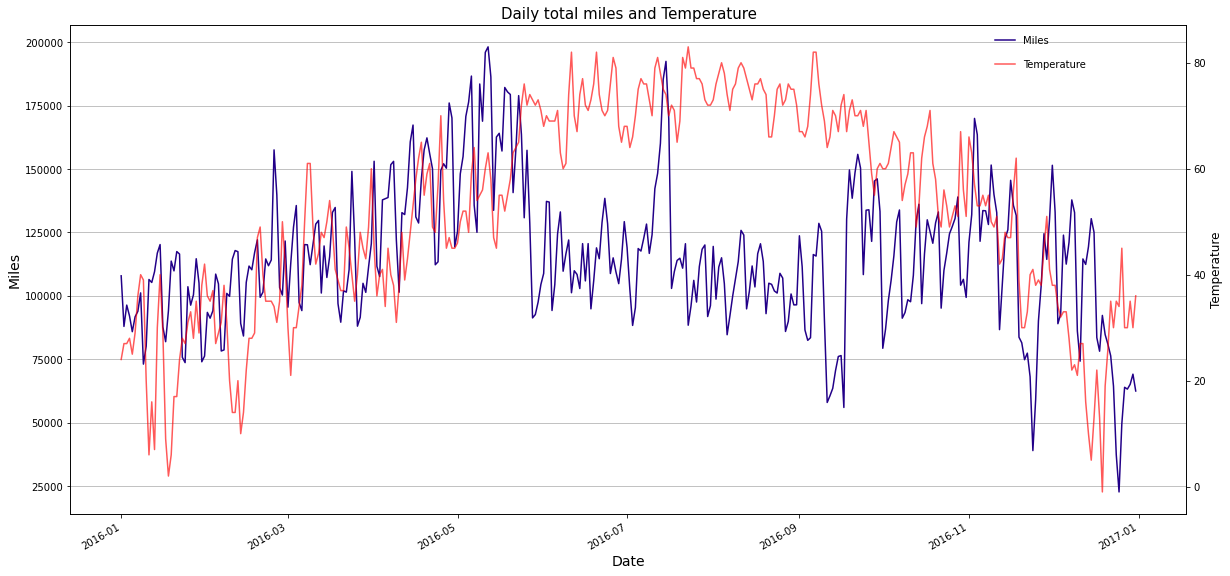

In [61]:
ax = merge_df['Total Trip Miles'].plot(label='Miles', figsize=(20, 10), c='#208')
plt.title('Daily total miles and Temperature', fontdict = {'fontsize': 15})


ax.set_ylabel('Miles', color='black', fontsize=14)


# add grid to graph
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
plt.legend()

# add 2nd y axis
ax1 = ax.twinx()


ax1 = merge_df['Temperature F'].plot(label='Temperature', c='r', alpha=.65)
ax1.set_ylabel('Temperature', c='black', fontsize=12)

# format y axis
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax1.yaxis.set_major_formatter(tick2)
plt.legend()

# set legend location
ax.legend(loc=(.825, .95), frameon=False)
ax1.legend(loc=(.825, .9), frameon=False)

# set x axis label
ax.set_xlabel('Date', c='black', fontsize=14)


# save the plot as a file
plt.savefig('Miles & Temperature.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()


In [62]:
miles_temp_corr = merge_df['Total Trip Miles'].corr(merge_df['Temperature F'])
miles_temp_corr

0.19700790488905762

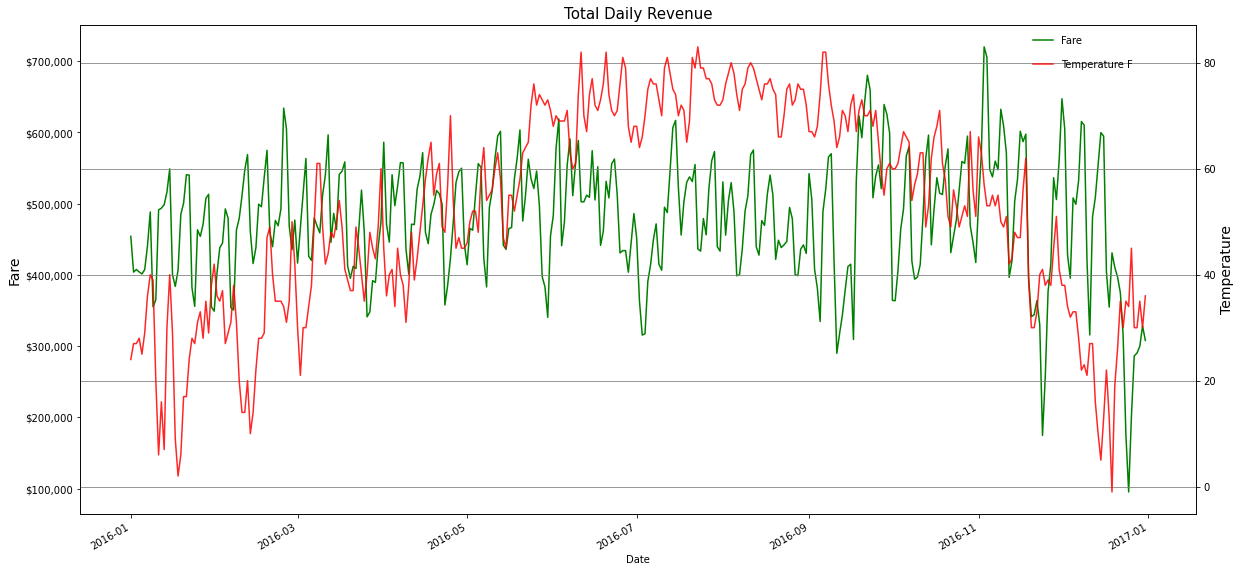

In [63]:
fig,ax7 = plt.subplots()
ax7 = merge_df['Total Fare $'].plot(label='Fare', figsize=(20, 10),color="green")
plt.title('Total Daily Revenue', fontdict = {'fontsize': 15})
yfmt = '${x:,.0f}'
yick = mtick.StrMethodFormatter(yfmt)
ax7.set_ylabel("Fare",color="black",fontsize=14)
ax7.yaxis.set_major_formatter(yick)
plt.legend()
ax8 = ax7.twinx()
ax8 = merge_df['Temperature F'].plot(color = 'red', figsize=(20, 10),alpha=.85)
ax8.set_ylabel("Temperature",color="black",fontsize=14)
plt.legend()
ax7.legend(loc = (.85,.95), frameon = False)
ax8.legend( loc = (.85, .9), frameon = False)
plt.grid(b=True, which='major', color='grey', linestyle='-')
correlation5 = merge_df['Total Fare $'].corr(merge_df['Temperature F'])
plt.show()
fig.savefig('Fare vs Temperature.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [64]:
correlation5


0.15899103325395533

In [69]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [70]:
db = client.ChicagoCabWeather
collection_all = db.CabWeather

In [71]:
collection_all.insert_many(merge_df.to_dict('records'))